In [1]:
import seaborn as sns
import pandas as pd

In [2]:
import kalman_filter_model
import numpy as np
import simdkalman
import matplotlib.pyplot as plt
from numpy.linalg import inv, multi_dot

shape_ = 100
kf = simdkalman.KalmanFilter(
    state_transition = [[1,1],[0,1]],       
    process_noise = np.diag([0.1, 0.01]),  
    observation_model = np.array([[1,0]]),
    observation_noise = 1)  
YY = np.array([10 * np.sin(x) for x in range(shape_)])
smoothed = kf.smooth(
    YY, initial_value = [1,0],
    initial_covariance = np.eye(2) * 0.5
)


Y = YY.reshape((shape_,1))
transisiton_matrix = np.array([[1,1],[0,1]])
obseravation_matrix = np.array([[1,0]])
R_matrix = np.array([[1]])
Q_matrix = np.diag([0.1, 0.01])
 

kf = kalman_filter_model.KalmanFilter(
    Y, transisiton_matrix, 
    obseravation_matrix, 
    R_matrix, Q_matrix
)


kf.filtering(np.array([1,0]), np.eye(2) * 0.5)
s = kf.smoothing()[0]

In [3]:
dict_1 = pd.DataFrame({'t': np.arange(shape_), 'y': list(map(lambda x: x[0], s)), 'hue': ['custom' for i in range(shape_)]})
dict_2 = pd.DataFrame({'t': np.arange(shape_), 'y': list(map(lambda x: x[0], Y)), 'hue': ['data' for i in range(shape_)]})
dict_3 = pd.DataFrame({'t': np.arange(shape_), 'y': smoothed.observations.mean, 'hue': ['kalm' for i in range(shape_)]})

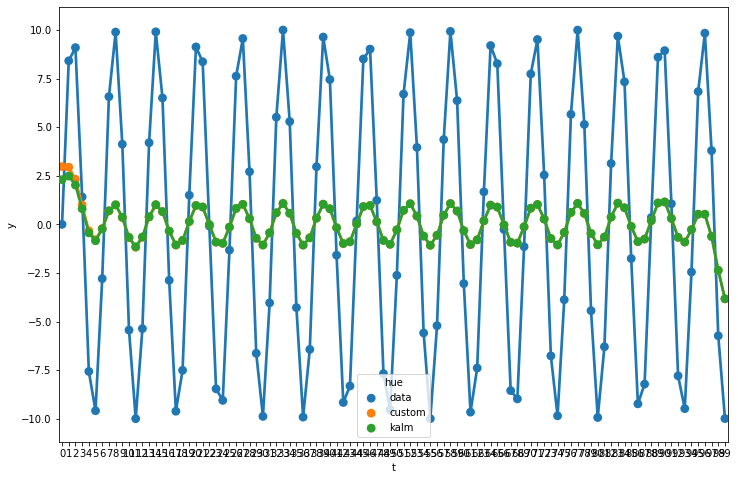

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(data=pd.concat([dict_2, dict_1, dict_3]), x='t', y='y', hue='hue', ax=ax)